In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [4]:
df = pd.read_csv('telecom_churn_data.csv')
df.set_index('mobile_number', inplace=True)
df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,N

In [5]:
df.shape

(99999, 225)

## Data Cleaning

In [6]:
# Function to create info of dataframe

def Data(df):
    x =  pd.DataFrame({
                      'Datatype' : df.dtypes.astype(str), 
                      'Non_Null_Count': df.count(axis = 0).astype(int), 
                      'Null_Count': df.isnull().sum().astype(int), 
                      'Null_Percentage': df.isnull().sum()/df.shape[0] * 100, 
                      'Unique_Values_Count': df.nunique().astype(int) 
                      })
    x.sort_values('Null_Percentage', ascending=False, inplace=True)
    return x
Data(df).head(20)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.846748,7418
av_rech_amt_data_6,float64,25153,74846,74.846748,887
fb_user_6,float64,25153,74846,74.846748,2
night_pck_user_6,float64,25153,74846,74.846748,2
total_rech_data_6,float64,25153,74846,74.846748,37
max_rech_data_6,float64,25153,74846,74.846748,48
count_rech_2g_6,float64,25153,74846,74.846748,31
count_rech_3g_6,float64,25153,74846,74.846748,25
date_of_last_rech_data_6,object,25153,74846,74.846748,30
arpu_2g_6,float64,25153,74846,74.846748,6990


### Impute with Zeros

In [7]:
# Few recharge columns who's minimum value is 1 and some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]
                 
df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [8]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge

df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ['date_of_last_rech_data_6', 'total_rech_data_6']].head()

,date_of_last_rech_data_6,total_rech_data_6
mobile_number,,
7001865778,NaN,NaN
7001625959,NaN,NaN
7001204172,NaN,NaN
7000286308,NaN,NaN
7001051193,NaN,NaN


In [9]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
               'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']
               
# impute missing values with 0 as the custumer didn't recharge for that particular month
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [10]:
Data(df[zero_impute])

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
total_rech_data_6,float64,99999,0,0.0,38
total_rech_data_7,float64,99999,0,0.0,43
total_rech_data_8,float64,99999,0,0.0,47
total_rech_data_9,float64,99999,0,0.0,38
av_rech_amt_data_6,float64,99999,0,0.0,888
av_rech_amt_data_7,float64,99999,0,0.0,962
av_rech_amt_data_8,float64,99999,0,0.0,974
av_rech_amt_data_9,float64,99999,0,0.0,946
max_rech_data_6,float64,99999,0,0.0,49
max_rech_data_7,float64,99999,0,0.0,49


### Handling missing values in date feature

In [11]:
dates = [col for col in df.columns if 'date' in col]

for date in dates:
    df[date] = pd.to_datetime(df[date], infer_datetime_format=True)
    df[date].fillna(df[date].mode()[0], inplace=True)

Data(df).loc[dates, :]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
last_date_of_month_6,datetime64[ns],99999,0,0.0,1
last_date_of_month_7,datetime64[ns],99999,0,0.0,1
last_date_of_month_8,datetime64[ns],99999,0,0.0,1
last_date_of_month_9,datetime64[ns],99999,0,0.0,1
date_of_last_rech_6,datetime64[ns],99999,0,0.0,30
date_of_last_rech_7,datetime64[ns],99999,0,0.0,31
date_of_last_rech_8,datetime64[ns],99999,0,0.0,31
date_of_last_rech_9,datetime64[ns],99999,0,0.0,30
date_of_last_rech_data_6,datetime64[ns],99999,0,0.0,30
date_of_last_rech_data_7,datetime64[ns],99999,0,0.0,31


### Unique values Count

In [12]:
'''Remove those unique values(i.e; no. of unique is 1)'''

uni_cnt = Data(df)
uni_cnt = uni_cnt[uni_cnt['Unique_Values_Count'] == 1]
print('Features with exactly one unique values are ', uni_cnt.index)
display(uni_cnt)
uni_cnt_columns = uni_cnt
df.drop(columns = uni_cnt.index.to_list(), inplace=True)
print('-------------------------------------------------------------------------------------------------')
print('No. of features removed = ', len(uni_cnt.index))

Features with exactly one unique values are  Index(['std_og_t2c_mou_9', 'std_ic_t2o_mou_9', 'std_ic_t2o_mou_8',
       'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_ic_t2o_mou_7', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'circle_id', 'last_date_of_month_9',
       'last_date_of_month_8', 'last_date_of_month_7', 'last_date_of_month_6'],
      dtype='object')


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,float64,92254,7745,7.745077,1
std_ic_t2o_mou_9,float64,92254,7745,7.745077,1
std_ic_t2o_mou_8,float64,94621,5378,5.378054,1
std_og_t2c_mou_8,float64,94621,5378,5.378054,1
std_ic_t2o_mou_6,float64,96062,3937,3.937039,1
std_og_t2c_mou_6,float64,96062,3937,3.937039,1
std_og_t2c_mou_7,float64,96140,3859,3.859039,1
std_ic_t2o_mou_7,float64,96140,3859,3.859039,1
std_og_t2o_mou,float64,98981,1018,1.018010,1
loc_ic_t2o_mou,float64,98981,1018,1.018010,1


-------------------------------------------------------------------------------------------------
No. of features removed =  16


### High percentage of missing values

In [13]:

'''Remove high percentage of missing values'''

high_missing = 100* df.isnull().sum()/df.shape[0]
print(high_missing[high_missing>55])
cols = high_missing[high_missing>55].index
print('No. of columns with high percentage of missing values : ', len(cols))
print('Columns need to removed are ', cols)
df.drop(columns=cols.to_list(), inplace=True)
print('Dimension of resultant Dataframe is ', df.shape)

count_rech_2g_6     74.846748
count_rech_2g_7     74.428744
count_rech_2g_8     73.660737
count_rech_2g_9     74.077741
count_rech_3g_6     74.846748
count_rech_3g_7     74.428744
count_rech_3g_8     73.660737
count_rech_3g_9     74.077741
arpu_3g_6           74.846748
arpu_3g_7           74.428744
arpu_3g_8           73.660737
arpu_3g_9           74.077741
arpu_2g_6           74.846748
arpu_2g_7           74.428744
arpu_2g_8           73.660737
arpu_2g_9           74.077741
night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64
No. of columns with high percentage of missing values :  24
Columns need to removed are  Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'ar

### Impute numerical features

In [14]:
impute_cols = [col for col in df.columns if 'date' not in col]
for col in impute_cols:
    df[col] = df[col].fillna(df[col].median())

Data(df).head()

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,99999,0,0.0,85681
total_rech_amt_9,int64,99999,0,0.0,2304
ic_others_8,float64,99999,0,0.0,1896
ic_others_9,float64,99999,0,0.0,1923
total_rech_num_6,int64,99999,0,0.0,102


## Filter High-value Customers

In churn prediction, we assume that there are three phases of customer lifecycle :


> The ‘good’ phase [Month 6 & 7]

> The ‘action’ phase [Month 8]

> The ‘churn’ phase [Month 9]

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [15]:
'''Average data recharge amount in Good Phase'''

# Recharge amount for each month in good phase
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

df['avg_amt_data_67'] = (df['total_data_rech_6']+df['total_rech_amt_6']+df['total_data_rech_7']+df['total_rech_amt_7'])/2

In [16]:
'''Locating high value customers'''

filter = df['avg_amt_data_67'].quantile(0.7)
print(f'High Value Customers whose recharge atleast ₹{filter}')

High Value Customers whose recharge atleast ₹478.0


In [17]:
high_cust = df[df['avg_amt_data_67']>=filter]
high_cust['avg_amt_data_67'].describe(include='all')

count    30001.000000
mean      1152.620628
std       1358.713982
min        478.000000
25%        603.000000
50%        800.000000
75%       1208.000000
max      61236.000000
Name: avg_amt_data_67, dtype: float64

In [18]:
# Remove features created to filter high-value customers
high_cust = high_cust.drop(['total_data_rech_6', 'total_data_rech_7', 'avg_amt_data_67'], axis=1)
high_cust.shape

(30001, 185)

## Data Preparation

### Derive Churn

In [19]:
'''Total incoming, outgoing calls for September'''
high_cust['calls_mou_9'] = high_cust['total_ic_mou_9'] + high_cust['total_og_mou_9']

'''Net data consumption'''
high_cust['vol_mb_9'] = high_cust['vol_2g_mb_9'] + high_cust['vol_3g_mb_9']

In [20]:
'''Churn variable'''
high_cust['churn'] = high_cust.apply(lambda x: 1 if(x['calls_mou_9'] == 0) and (x['vol_mb_9'] == 0) else 0, axis=1)

In [21]:
'''Remove derived features'''
high_cust.drop(columns = ['calls_mou_9','vol_mb_9'], inplace=True)

### Remove columns related to target month(i.e; September)

In [22]:
high_cust = high_cust.filter(regex='[^9]$', axis=1)
high_cust.shape

(30001, 141)

### Multicolinearity

In [23]:
'''Function for comparing in and og for respective month'''
def corr(title1, title2, var1, var2):
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(19,7)) 
    ax0 = sns.heatmap(var1.corr(), center=0.5, annot=True, cmap='RdYlGn', ax=ax0)
    ax1 = sns.heatmap(var2.corr(), center=0.5, annot=True, cmap='RdYlGn', ax=ax1)
    #Annotation
    ax0.title.set_text(title1)
    ax1.title.set_text(title2)  
    plt.tight_layout()
    return plt.show()

In [24]:
'''Filter incoming and Outgoing calls for June, July, and August'''

mou_og_cols_6 = high_cust.columns[high_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]
mou_og_cols_7 = high_cust.columns[high_cust.columns.str.contains('.*_og_.*mou_7',regex=True)]
mou_og_cols_8 = high_cust.columns[high_cust.columns.str.contains('.*_og_.*mou_8',regex=True)]

mou_ic_cols_6 = high_cust.columns[high_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
mou_ic_cols_7 = high_cust.columns[high_cust.columns.str.contains('.*_ic_.*mou_7',regex=True)]
mou_ic_cols_8 = high_cust.columns[high_cust.columns.str.contains('.*_ic_.*mou_8',regex=True)]

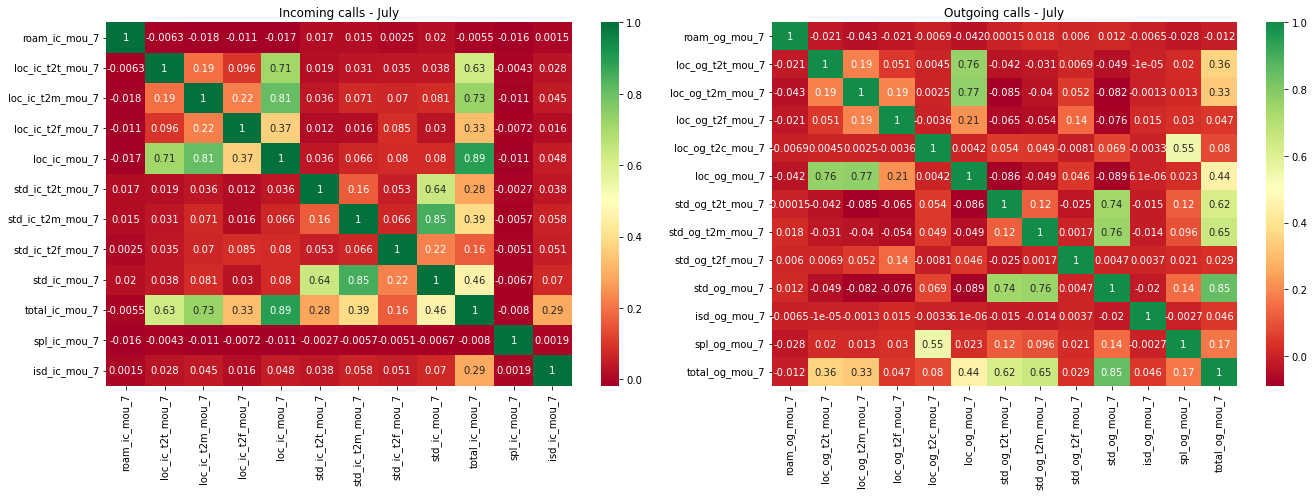

In [25]:
corr('Incoming calls - July', 'Outgoing calls - July', df[mou_ic_cols_7], high_cust[mou_og_cols_7])

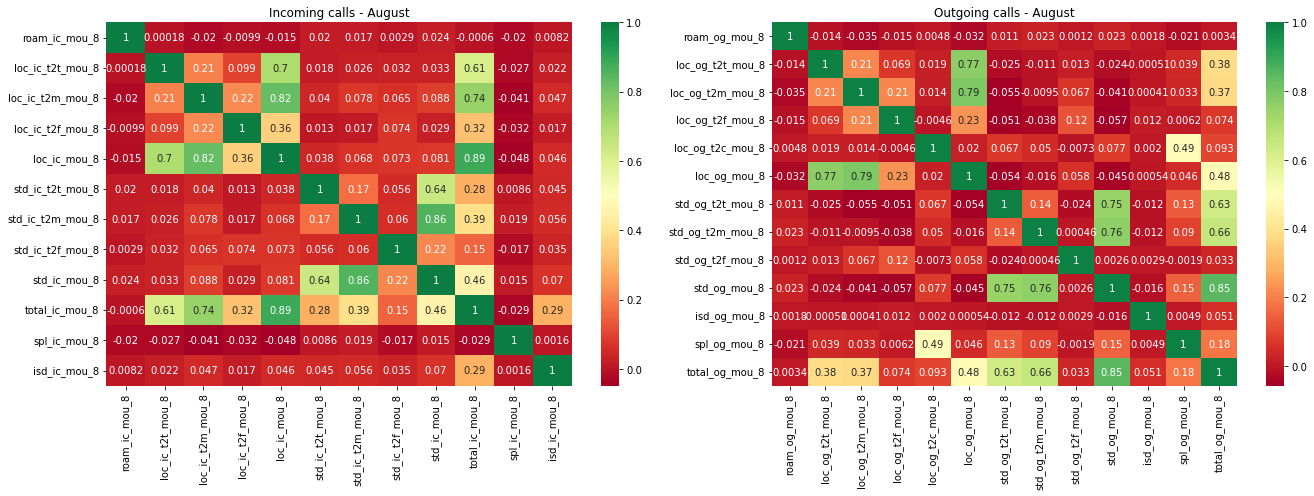

In [26]:
corr('Incoming calls - August', 'Outgoing calls - August', df[mou_ic_cols_8], high_cust[mou_og_cols_8])

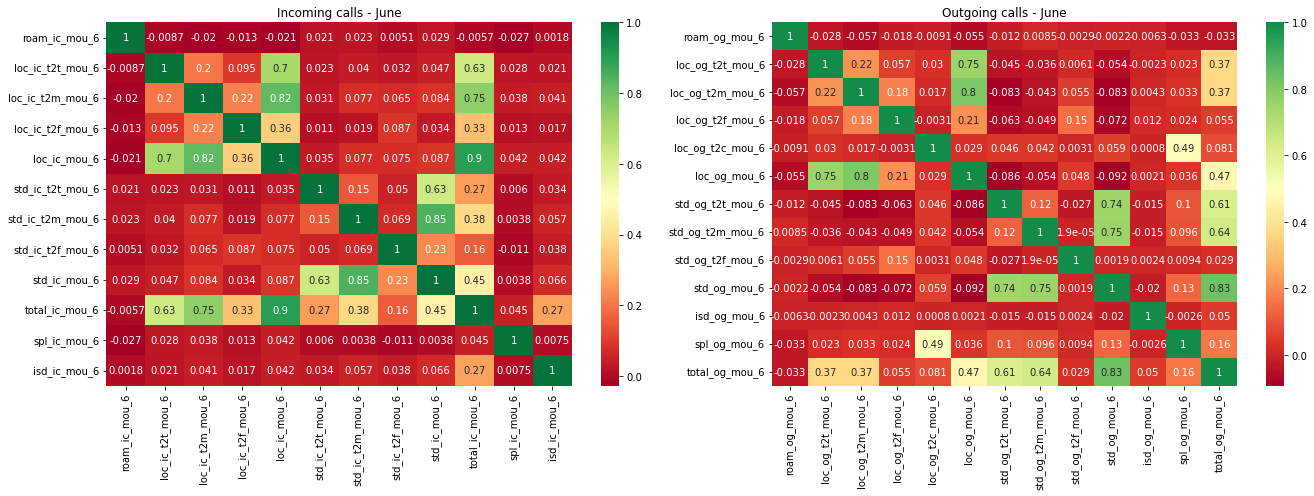

In [27]:
corr('Incoming calls - June', 'Outgoing calls - June', df[mou_ic_cols_6], high_cust[mou_og_cols_6])





<b>Inference:</b>

    * We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in  dataset. 
      So we can remove these columns for all months from the data set
    * We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seems to have strong correlation with other fileds and     
      they needs to be inspected to avoid any multicolinearity issues.

In [28]:
total_incoming = high_cust.columns[high_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou', regex=True)]
high_cust.drop(total_incoming, axis=1, inplace=True)
print('Columns dropped - ')
total_incoming.tolist()

Columns dropped - 


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [29]:
total_outgoing = high_cust.columns[high_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou', regex=True)]
high_cust.drop(total_outgoing, axis=1, inplace=True)
print('Columns dropped - ')
total_outgoing.tolist()

Columns dropped - 


['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

## Visualisation

In [30]:
'''Create a function to visualise'''
def univariate(feature):
    sns.distplot(feature)
    print(feature.describe())
            
def bivariate(var1, var2=high_cust['churn']):
    sns.barplot(y = var1 ,x = var2)
    plt.show()

### Univariate EDA

count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64


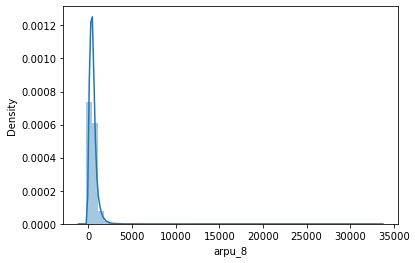

In [31]:
univariate(high_cust['arpu_8'])

count    30001.000000
mean       148.511781
std        213.624715
min          0.000000
25%         31.390000
50%         80.040000
75%        185.730000
max       4643.490000
Name: loc_ic_t2m_mou_8, dtype: float64


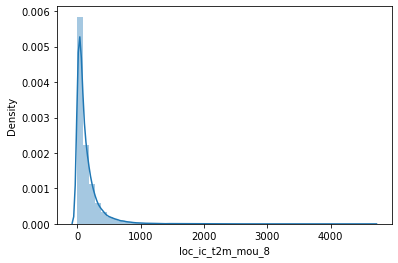

In [32]:
univariate(high_cust.loc_ic_t2m_mou_8)

count    30001.000000
mean        12.500551
std         74.125281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4169.810000
Name: roam_ic_mou_8, dtype: float64


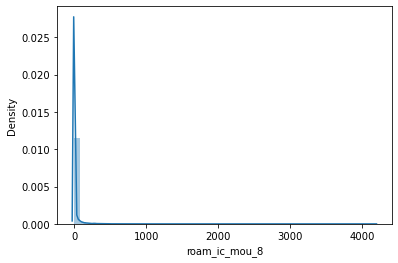

In [33]:
univariate(high_cust.roam_ic_mou_8)

count    30001.000000
mean         9.972868
std          9.274370
min          0.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        196.000000
Name: total_rech_num_8, dtype: float64


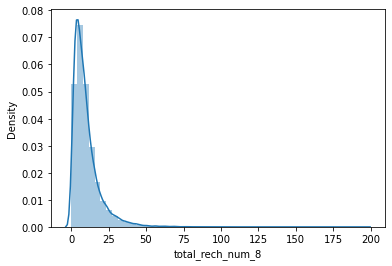

In [34]:
univariate(high_cust.total_rech_num_8)

### Bivariate EDA

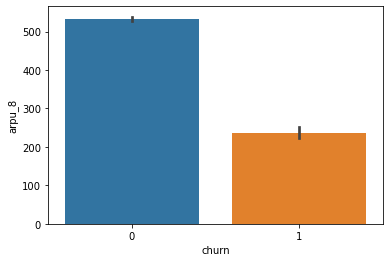

In [35]:
bivariate(high_cust['arpu_8'])

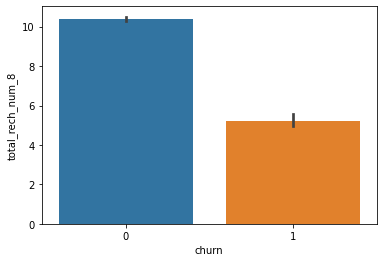

In [36]:
bivariate(high_cust['total_rech_num_8'])

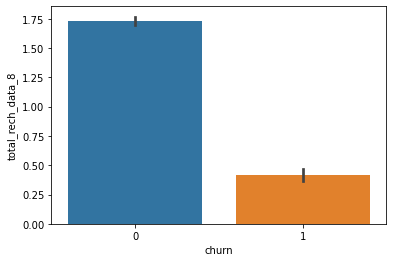

In [37]:
bivariate(high_cust['total_rech_data_8'])

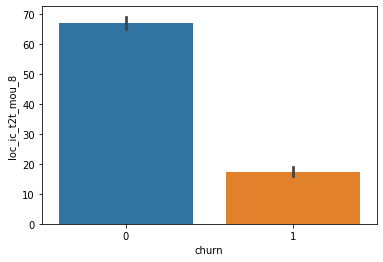

In [38]:
bivariate(high_cust['loc_ic_t2t_mou_8'])

### Class Imbalance

In [39]:
y = high_cust['churn']
X = high_cust.drop(['churn'], axis=1)

dates = [col for col in high_cust if 'date' in col]
X = X.drop(columns=dates, axis=1)   #drop date (for class imbalance)

In [40]:
'''Function for class Imbalance'''
def class_imbalance(var1, var2):
    fig, (ax0,ax1) = plt.subplots(1,2)
    pie_chart1 = var1.value_counts(normalize=True)*100.0
    pie_chart2 = var2.value_counts(normalize=True)*100.0
    
    ax0 = pie_chart1.plot.pie(autopct='%.1f%%', explode=(0.1,0), labels = ['No', 'Yes'],figsize =(20,5), fontsize = 12 , ax=ax0)
    ax1 = pie_chart2.plot.pie(autopct='%.1f%%', explode=(0.1,0), labels = ['No', 'Yes'],figsize =(20,5), fontsize = 12 , ax=ax1)
    #Annotation
    ax0.title.set_text('Before class Imbalance')
    ax1.title.set_text('After class Imbalance')  
    plt.show()

In [41]:
'''Check target variable either balanced or not'''
high_cust['churn'].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=100)

In [43]:
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

X_SMOTE.shape, y_SMOTE.shape

((55120, 116), (55120,))

In [44]:
'''Data is balanced'''
y_SMOTE.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: churn, dtype: float64

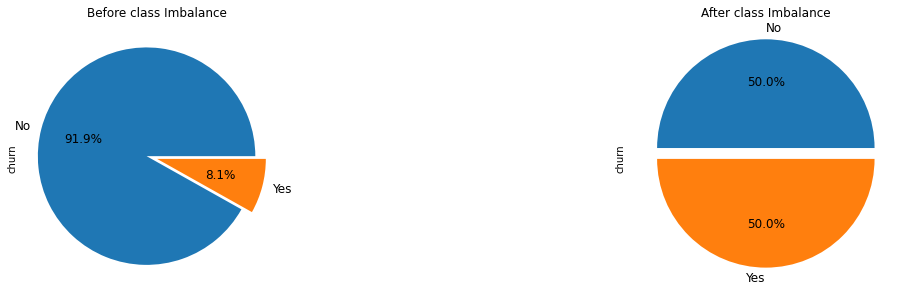

In [45]:
# Distribution - Churn
class_imbalance(high_cust['churn'], y_SMOTE)

### Outlier Treatment

In [46]:
# libraries
import scipy.stats as stats
from scipy.stats import mstats

In [47]:
# Custom function for handling, plotting outliers
def outlier_graph(df):
    sns.set_style('dark')
    for col in df.columns:
        plt.figure(figsize=(15,4))
        
        plt.subplot(131)
        sns.distplot(df[col], label='skew : '+ str(np.round(df[col].skew(),2)))
        plt.legend(loc='best')
        
        plt.subplot(132)
        sns.boxplot(df[col])
        
        plt.subplot(133)
        stats.probplot(df[col], plot=plt)
        plt.tight_layout()
        plt.show()

def outlier_treatment(df):
    return mstats.winsorize(df, limits=(0.05,0.05))  #capping the values below 5th percentile and above 95th percentile

def skew_data(df):
    print('Skewed features = ', len(df.skew()))
    return pd.DataFrame({'skewness' : df.skew().sort_values(ascending=False)})

In [48]:
'''Skewness of the data before transformation'''
skew_data(X_SMOTE)

Skewed features =  116


,skewness
og_others_6,114.912724
isd_og_mou_8,110.960141
spl_ic_mou_7,84.890818
isd_og_mou_7,84.038987
isd_og_mou_6,82.163931
ic_others_6,73.019624
og_others_8,68.435731
og_others_7,68.339302
ic_others_8,58.886542
ic_others_7,56.259100


In [49]:
'''Outlier treatment using  winsorization technique to cap'''
X_SMOTE = X_SMOTE.apply(outlier_treatment, axis=0)  #capping the values below 5th percentile and above 95th percentile

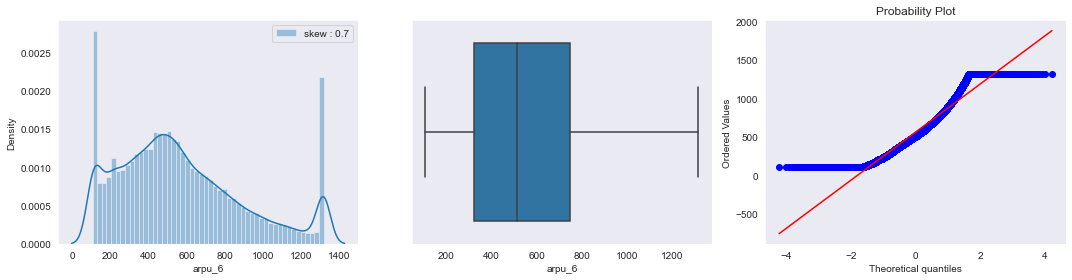

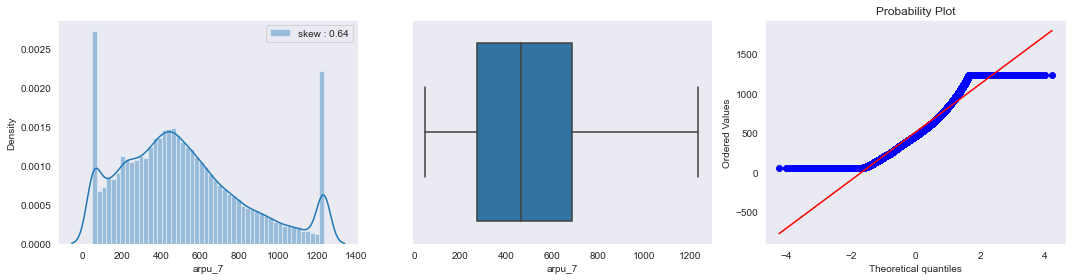

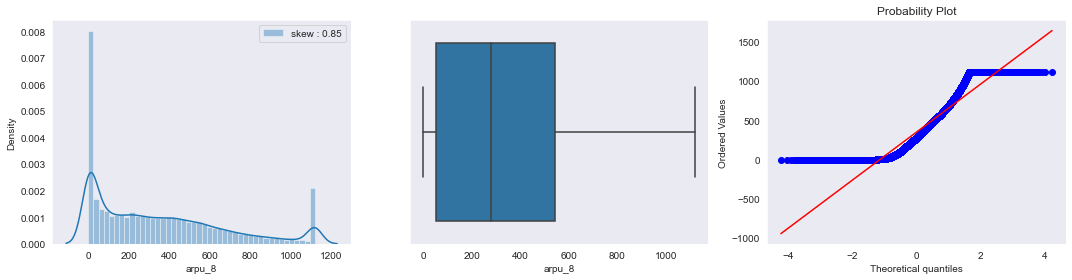

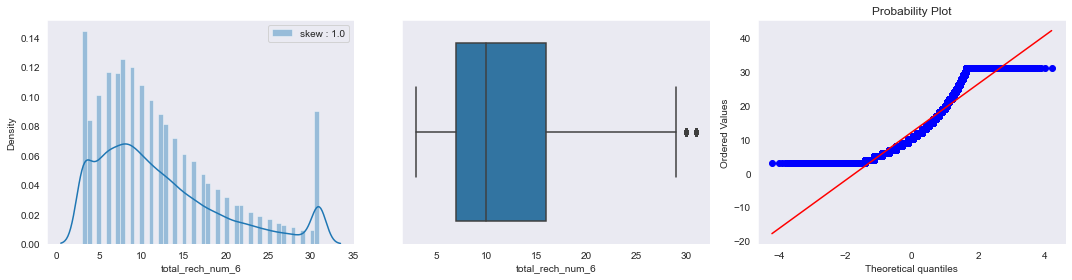

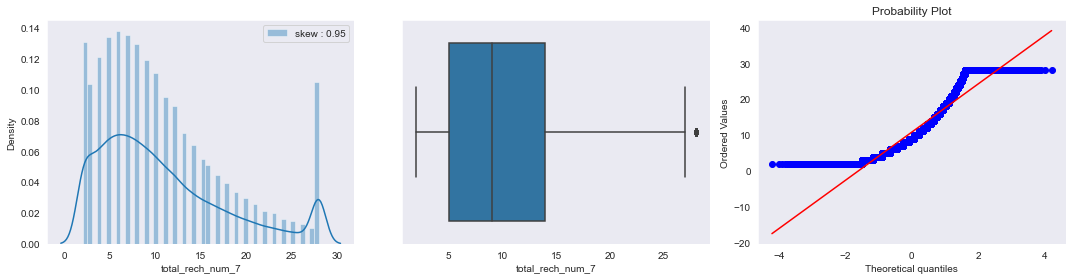

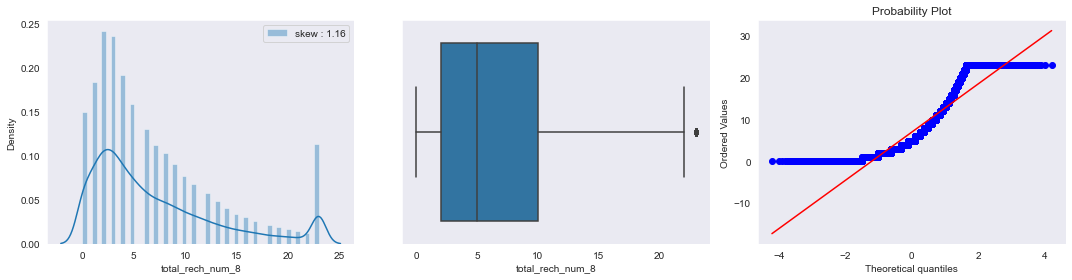

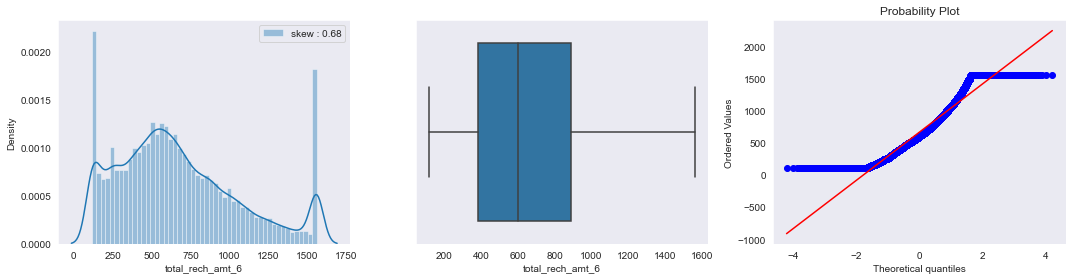

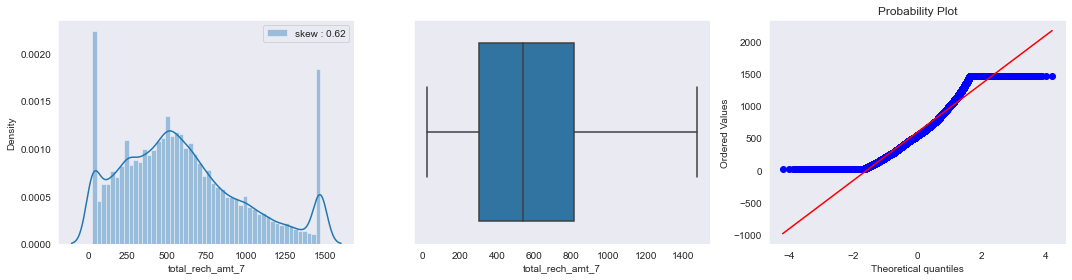

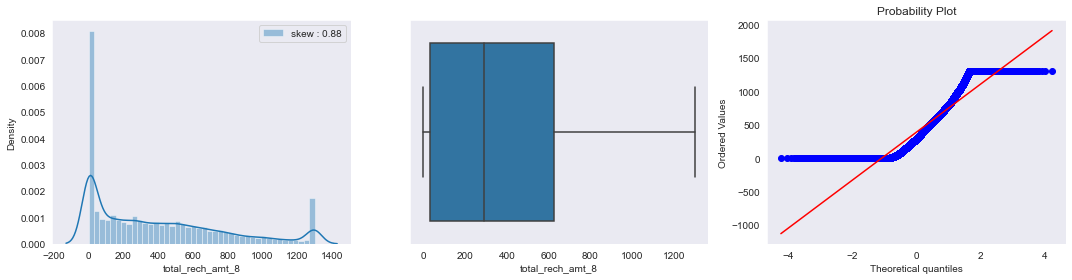

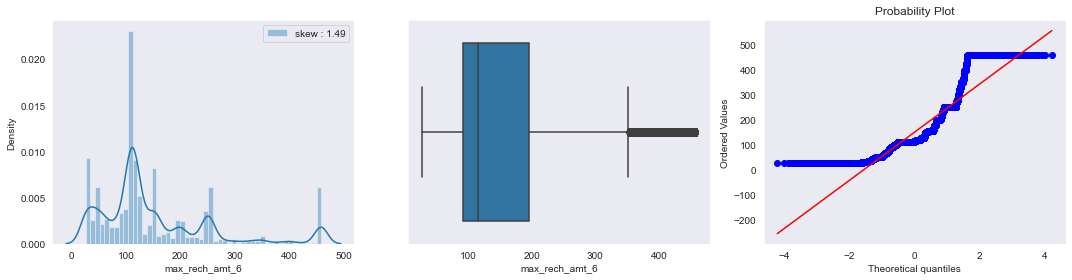

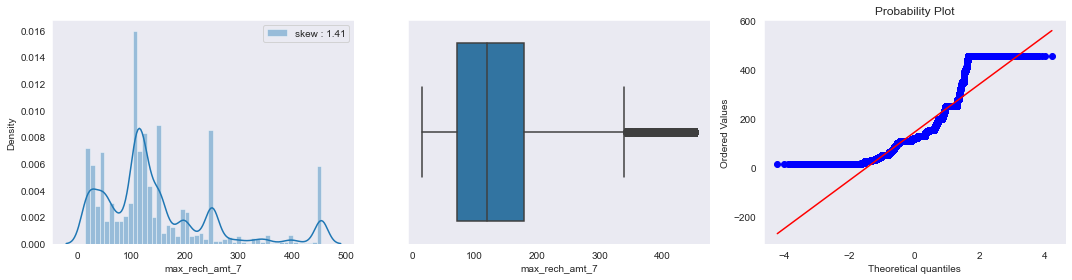

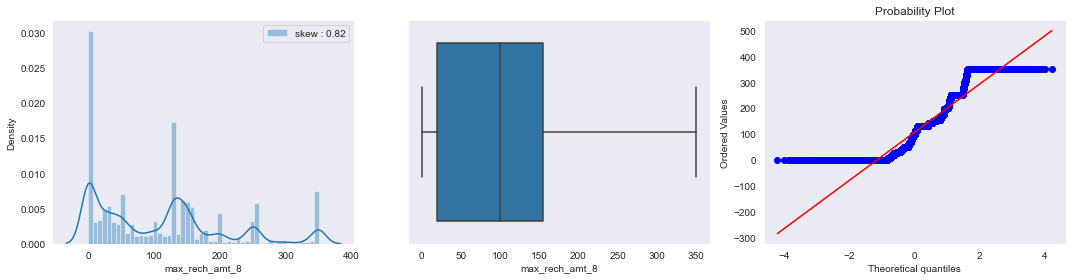

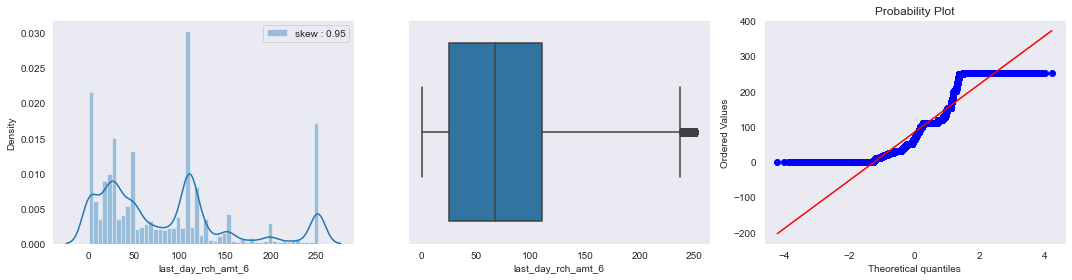

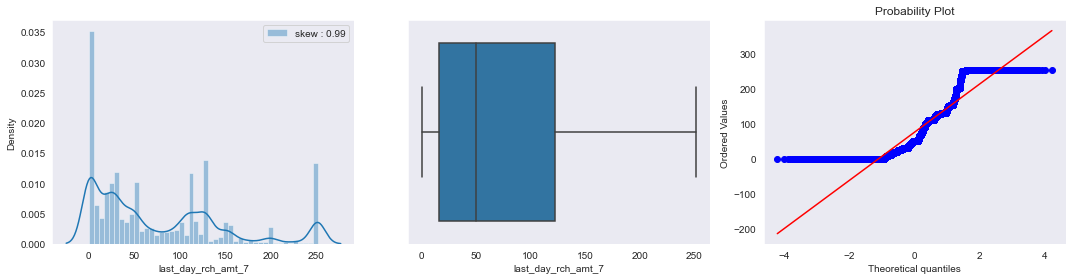

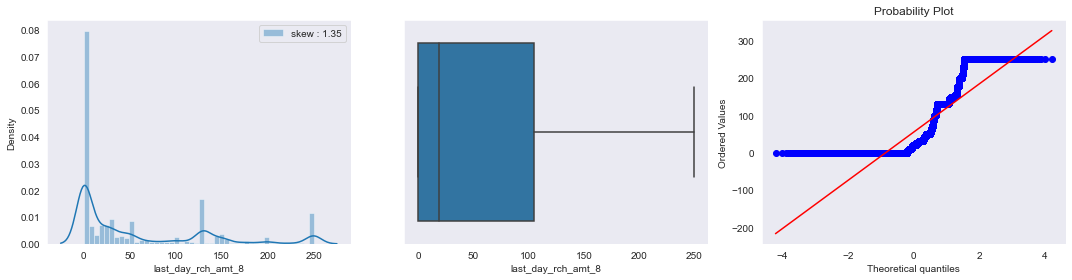

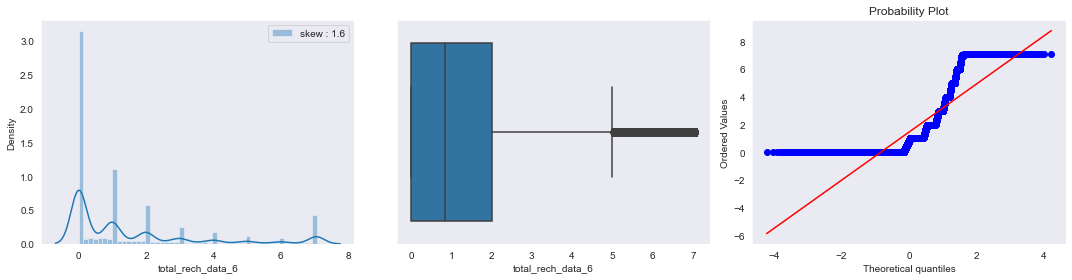

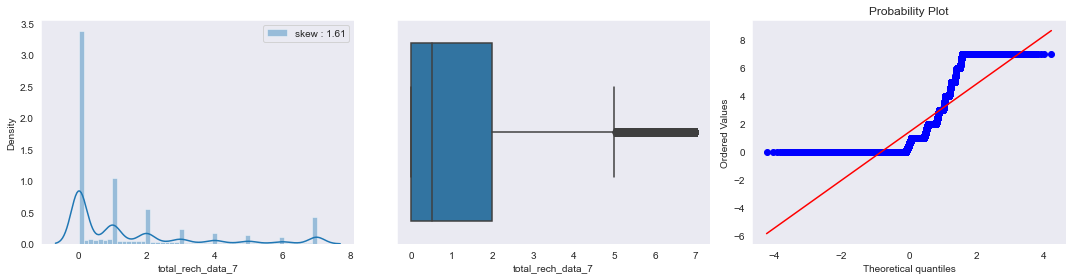

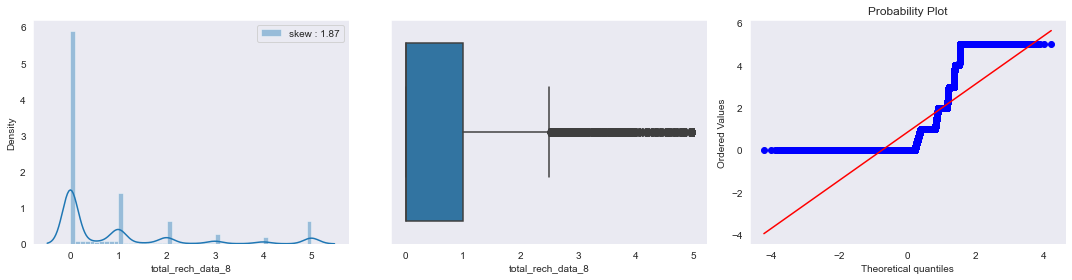

In [50]:
'''Visualise outliers for 10 features'''
features = ['arpu_6', 'arpu_7', 'arpu_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6',
            'total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6',
            'last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8']

outlier_graph(X_SMOTE[features])

In [51]:
'''Data skewness after outlier treatment'''
skew_data(X_SMOTE)    # Skewness of the data are within the range[0,5]

Skewed features =  116


,skewness
spl_ic_mou_8,3.978406
sep_vbc_3g,3.923413
sachet_3g_8,3.905178
isd_og_mou_8,3.897413
isd_og_mou_7,3.620384
isd_og_mou_6,3.505566
spl_ic_mou_7,3.424280
std_og_t2f_mou_8,3.411019
monthly_2g_8,3.166908
std_og_t2f_mou_7,3.161092


### Split the data into Train, Test 

In [52]:
# Libraries
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=1/5, random_state=9, stratify=y_SMOTE)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(44096, 116) (44096,) (11024, 116) (11024,)


### Features

In [54]:
features = X_train.columns.to_list()
print('Total Features :', len(features))
print('Features - ')
features   # We may use this later.

Total Features : 116
Features - 


['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 

## Scaling

In [55]:
# Libraries
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()
X_train[features] = sc.fit_transform(X_train[features])
X_test[features] = sc.transform(X_test[features])

print(X_train.shape, X_test.shape)

(44096, 116) (11024, 116)


## Modelling

In [57]:
# Libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier

In [58]:
# import six
# import sys
# sys.modules['sklearn.externals.six'] = six

In [59]:
'''Fucntion to show summary of the model'''
def stats(model, X_test, y_test):
    y_pred = model.predict(X_test) 
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')

    accuracy = round(accuracy_score(y_test,y_pred),2)
    sensitivity = round(sensitivity,2)
    specificity = round(specificity,2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[accuracy,sensitivity,specificity,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Accuracy(Prediction)','Sensitivity','Specificity','AUC','F1 Score'])
    return df

## Interpretable Model

In [60]:
# create pipeline
prototype = LogisticRegression()

prototype.fit(X_train, y_train)

LogisticRegression()

In [61]:
# check score on train data
print(prototype.score(X_train, y_train))
print(prototype.score(X_test, y_test))

0.8806694484760522
0.8797169811320755


In [62]:
'''Hyperparameter tuning'''
prototype = LogisticRegression()

parameters = [{ 'C': [0.1, 0.5, 5]}]

# Cross-validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

prototype_cv = GridSearchCV(estimator=prototype, 
                         param_grid =parameters,
                         scoring= 'roc_auc',
                         cv=folds, 
                         return_train_score=True,
                         n_jobs=-1,
                         verbose=1)

prototype_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.5, 5]}], return_train_score=True,
             scoring='roc_auc', verbose=1)

In [63]:
# print best hyperparameters
print("Best AUC: ", prototype_cv.best_score_)
print("Best hyperparameters: ", prototype_cv.best_params_)

Best AUC:  0.9428175148332782
Best hyperparameters:  {'C': 5}


In [64]:
'''Prototype model'''
prototype = LogisticRegression(C=5)
prototype.fit(X_train, y_train)

LogisticRegression(C=5)

In [65]:
print(prototype.score(X_train, y_train))
print(prototype.score(X_test, y_test))

0.8807601596516691
0.8798076923076923


In [66]:
y_pred = prototype.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4838,  674],
       [ 651, 4861]], dtype=int64)

In [67]:
# Model evaluvation results
# Base_model
Stats_prototype = stats(prototype, X_test, y_test)
Stats_prototype

,Accuracy(Prediction),Sensitivity,Specificity,AUC,F1 Score
0,0.88,0.88,0.88,0.88,0.88


### PCA

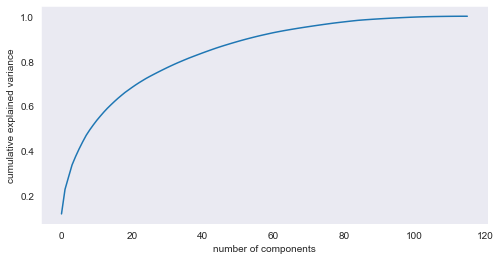

In [68]:
# check the variance explained by different PCAs
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)

fig = plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [69]:
# Features explain about variance in the data
'''we can see that, 95% of variance of the data is  explained by 68 components'''
pd.Series(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

0      12.02
1      22.95
2      28.45
3      33.85
4      37.59
5      40.98
6      44.10
7      47.01
8      49.42
9      51.61
10     53.68
11     55.55
12     57.36
13     59.04
14     60.58
15     62.06
16     63.48
17     64.80
18     66.09
19     67.22
20     68.34
21     69.42
22     70.44
23     71.40
24     72.34
25     73.20
26     74.02
27     74.83
28     75.62
29     76.40
30     77.17
31     77.91
32     78.63
33     79.33
34     79.99
35     80.65
36     81.30
37     81.90
38     82.50
39     83.09
40     83.68
41     84.25
42     84.81
43     85.36
44     85.90
45     86.41
46     86.91
47     87.39
48     87.86
49     88.32
50     88.78
51     89.22
52     89.65
53     90.06
54     90.46
55     90.85
56     91.23
57     91.59
58     91.94
59     92.29
60     92.63
61     92.94
62     93.24
63     93.53
64     93.81
65     94.08
66     94.34
67     94.60
68     94.85
69     95.09
70     95.33
71     95.56
72     95.79
73     96.02
74     96.24
75     96.46
76     96.67

In [70]:
# Applying PCA : Pricnipal Component Analysis to balanced train and test data
pca = PCA(n_components=69)

X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

In [71]:
PCA_data = pd.DataFrame({'PC1':pca.components_[0],
                         'PC2':pca.components_[1], 
                         'PC3':pca.components_[2],
                         'Feature':features})
PCA_data.head(15)

,PC1,PC2,PC3,Feature
0,0.074493,0.134466,-0.084635,arpu_6
1,0.135027,0.134622,0.047549,arpu_7
2,0.186595,0.073795,0.120231,arpu_8
3,-0.013280,0.149355,0.022716,onnet_mou_6
4,0.015011,0.154841,0.084016,onnet_mou_7
5,0.066214,0.129856,0.128304,onnet_mou_8
6,0.040077,0.154485,-0.033735,offnet_mou_6
7,0.076296,0.160988,0.038579,offnet_mou_7
8,0.135971,0.122784,0.091534,offnet_mou_8
9,0.015591,0.035879,-0.091921,roam_ic_mou_6


## Black-Box Model

### Logistic Regression
#### Hyper Parameter Tuning

In [72]:
'''Hyperparameter tuning'''
log_reg = LogisticRegression()

parameters = [{ 'C': [0.1, 0.5, 1, 5], 
                'penalty': ['l1', 'l2'],
                'solver' : ['saga', 'lbfgs'] }]

# Cross-validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

lr_cv = GridSearchCV(estimator=log_reg, 
                         param_grid =parameters,
                         scoring= 'roc_auc',
                         cv=folds, 
                         return_train_score=True,
                         n_jobs=-1,
                         verbose=1)

lr_cv.fit(X_train_PCA, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.5, 1, 5], 'penalty': ['l1', 'l2'],
                          'solver': ['saga', 'lbfgs']}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [73]:
pd.DataFrame(lr_cv.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.998616,0.085148,0.011120,0.002585,0.1,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.922728,0.919922,0.924755,0.922564,0.919005,0.921795,0.002074,12,0.922403,0.923082,0.921901,0.922466,0.923390,0.922648,0.000527
1,0.085269,0.012015,0.000000,0.000000,0.1,l1,lbfgs,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.403989,0.043628,0.008730,0.000593,0.1,l2,saga,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.922840,0.919940,0.924774,0.922594,0.918924,0.921814,0.002111,1,0.922421,0.923119,0.921939,0.922496,0.923426,0.922680,0.000529
3,0.420429,0.026512,0.008531,0.000480,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.922839,0.919940,0.924773,0.922594,0.918923,0.921814,0.002111,2,0.922422,0.923119,0.921938,0.922496,0.923426,0.922680,0.000529
4,2.032099,0.095990,0.010155,0.003115,0.5,l1,saga,"{'C': 0.5, 'penalty': 'l1', 'solver': 'saga'}",0.922838,0.919932,0.924763,0.922597,0.918932,0.921812,0.002107,8,0.922421,0.923117,0.921938,0.922495,0.923425,0.922679,0.000529


In [74]:
# print best hyperparameters
print('Best AUC: ', lr_cv.best_score_)
print('Best hyperparameters: ', lr_cv.best_params_)

Best AUC:  0.9218144115233654
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [75]:
'''Tuned logistic regression model'''
M1 = LogisticRegression(C=0.1, penalty='l1', solver='saga')
M1.fit(X_train_PCA, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [76]:
# check score on train, test data
print(M1.score(X_train_PCA, y_train))
print(M1.score(X_test_PCA, y_test))

0.8524582728592163
0.8531386066763426


In [77]:
M1.coef_.ravel()

array([-0.48618294,  0.17753922, -0.49149529,  0.02653191,  0.06812942,
       -0.09345183,  0.43867675,  0.09946308,  0.27116065, -0.14191947,
        0.26960277, -0.28010888, -0.20849947, -0.40542076, -0.15097435,
       -0.150646  ,  0.15932504, -0.01174248,  0.03805969, -0.13040406,
       -0.08185422, -0.03863911, -0.24635876,  0.13660367,  0.04101104,
       -0.04920052, -0.21684262,  0.09236195, -0.23453909, -0.03911423,
       -0.12219915, -0.17141814, -0.02743502, -0.20506121, -0.29676287,
       -0.24668734,  0.11987443, -0.04072712, -0.05557112, -0.17697438,
        0.00824909, -0.16298657, -0.00920571, -0.05522861, -0.04745664,
       -0.18415905,  0.23119267,  0.06981039,  0.0555426 ,  0.1128893 ,
       -0.08582964,  0.25546294,  0.08989443, -0.02772143, -0.23403872,
       -0.1519188 ,  0.05390738, -0.01137523, -0.04202612,  0.07759427,
       -0.10902938, -0.0005736 ,  0.07368855,  0.47755756,  0.11653489,
        0.42460302, -0.09304438, -0.13813954, -0.15790782])

In [78]:
y_pred = M1.predict(X_test_PCA)
confusion_matrix(y_test, y_pred)

array([[4700,  812],
       [ 807, 4705]], dtype=int64)

In [79]:
'''Summary '''
lr_stats = stats(M1, X_test_PCA, y_test)
lr_stats

,Accuracy(Prediction),Sensitivity,Specificity,AUC,F1 Score
0,0.85,0.85,0.85,0.85,0.85


### Random Forest Classifier

In [80]:
rf = RandomForestClassifier(oob_score=True)

rf.fit(X_train_PCA, y_train)

RandomForestClassifier(oob_score=True)

In [81]:
'''This is highly over-fitted model, we have to tune the model'''
print(rf.score(X_train_PCA, y_train))
print(rf.score(X_test_PCA, y_test))

1.0
0.9385885341074021


In [82]:
print(rf.oob_score_)   

0.9338942307692307


#### Hyper Parameter Tuning

In [83]:
model = RandomForestClassifier()
# hyperparameter space

parameters = {
              'bootstrap': [True],
              'max_depth': [10, 15],
              'criterion': ['gini', 'entropy'], 
              'max_features': ['auto'],
              'min_samples_leaf': [10,20],
              'min_samples_split': [10,20]
             }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object 
rf_model = GridSearchCV(estimator = model, 
                        cv = folds, 
                        param_grid = parameters, 
                        scoring = 'roc_auc', 
                        n_jobs = -1, 
                        verbose = 1)

# fit model
rf_model.fit(X_train_PCA, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'max_features': ['auto'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20]},
             scoring='roc_auc', verbose=1)

In [84]:
# cross validation results
pd.DataFrame(rf_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,43.065749,0.353384,0.236882,0.005543,True,gini,10,auto,10,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.942073,0.943606,0.942473,0.941233,0.937918,0.941461,0.001929,11
1,43.511739,0.538990,0.270639,0.050761,True,gini,10,auto,10,20,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.943281,0.942236,0.943095,0.941606,0.939032,0.941850,0.001533,10
2,43.047063,1.111886,0.280960,0.057893,True,gini,10,auto,20,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.939115,0.939932,0.940192,0.939130,0.936063,0.938887,0.001475,15
3,43.352823,0.256358,0.240439,0.022797,True,gini,10,auto,20,20,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.941021,0.941277,0.940640,0.938972,0.935866,0.939555,0.002012,13
4,55.446561,0.728062,0.291258,0.025508,True,gini,15,auto,10,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.960690,0.960349,0.959497,0.959750,0.957319,0.959521,0.001179,4


In [85]:
# print best hyperparameters
print('Best AUC: ', rf_model.best_score_)
print('Best hyperparameters: ', rf_model.best_params_)

Best AUC:  0.9614029910681234
Best hyperparameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10}


In [86]:
# Tuned parameter
M2 = RandomForestClassifier( max_depth=15,
                             bootstrap = True,
                             n_estimators = 200,
                             criterion = 'entropy',
                             max_features = 'auto',
                             min_samples_leaf = 10,
                             min_samples_split = 20,
                             oob_score = True, 
                             n_jobs = -1 )
M2.fit(X_train_PCA, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, n_jobs=-1,
                       oob_score=True)

In [87]:
print(M2.score(X_train_PCA, y_train))
print(M2.score(X_test_PCA, y_test))

0.9519230769230769
0.9067489114658926


In [88]:
# OOB score
print(M2.oob_score_)

0.9049573657474601


In [89]:
y_pred = M2.predict(X_test_PCA)
confusion_matrix(y_test, y_pred)

array([[5034,  478],
       [ 550, 4962]], dtype=int64)

In [90]:
rfc_stats = stats(M2, X_test_PCA, y_test)
rfc_stats

,Accuracy(Prediction),Sensitivity,Specificity,AUC,F1 Score
0,0.91,0.9,0.91,0.91,0.91


### XG Boost  classifier

In [91]:
xgb = XGBClassifier()
xgb.fit(X_train_PCA, y_train)

[19:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
'''This is over-fitted model, we have to tune the model'''
print(xgb.score(X_train_PCA, y_train))
print(xgb.score(X_test_PCA, y_test))

0.9787055515239478
0.9331458635703919


In [93]:
stats(xgb,  X_test_PCA, y_test)

,Accuracy(Prediction),Sensitivity,Specificity,AUC,F1 Score
0,0.93,0.95,0.92,0.93,0.93


#### Hyper Parameter Tuning

In [94]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
param_grid = {'bootstrap' : [True],
              'learning_rate': [0.1, 0.3, 0.5], 
             'subsample': [0.2, 0.3]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200, n_jobs=-1)

# set up GridSearchCV()
xgb_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc',
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True) 

xgb_cv.fit(X_train_PCA, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[19:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=...ints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                   

In [95]:
pd.DataFrame(xgb_cv.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,45.799391,0.403254,0.068811,0.018521,True,0.1,0.2,"{'bootstrap': True, 'learning_rate': 0.1, 'sub...",0.933149,0.929799,0.930454,0.931978,0.927849,0.930646,0.001823,5,0.936067,0.936690,0.936535,0.936102,0.937066,0.936492,0.000375
1,46.207069,0.417373,0.052381,0.015354,True,0.1,0.3,"{'bootstrap': True, 'learning_rate': 0.1, 'sub...",0.930935,0.929683,0.931115,0.930745,0.927465,0.929989,0.001356,6,0.934698,0.936346,0.936192,0.936462,0.937189,0.936177,0.000815
2,46.598617,0.447118,0.079115,0.024933,True,0.3,0.2,"{'bootstrap': True, 'learning_rate': 0.3, 'sub...",0.945324,0.940990,0.944206,0.942531,0.941600,0.942930,0.001616,3,0.953280,0.954329,0.954433,0.954020,0.954780,0.954168,0.000506
3,47.150258,0.183043,0.073595,0.024185,True,0.3,0.3,"{'bootstrap': True, 'learning_rate': 0.3, 'sub...",0.947256,0.943163,0.944560,0.943920,0.941864,0.944153,0.001793,2,0.955487,0.956263,0.956025,0.955542,0.956894,0.956042,0.000516
4,42.373487,8.648978,0.077788,0.026870,True,0.5,0.2,"{'bootstrap': True, 'learning_rate': 0.5, 'sub...",0.940248,0.938032,0.939280,0.937496,0.938258,0.938663,0.000982,4,0.954691,0.956989,0.956093,0.957248,0.956018,0.956208,0.000899


In [96]:
# print best hyperparameters
print("Best AUC: ", xgb_cv.best_score_)
print("Best hyperparameters: ", xgb_cv.best_params_)

Best AUC:  0.9441730803435057
Best hyperparameters:  {'bootstrap': True, 'learning_rate': 0.5, 'subsample': 0.3}


In [97]:
M3 = XGBClassifier(learning_rate=0.5, 
                   bootstrap=True,
                   max_depth=2, 
                   n_estimators=200,
                   subsample=0.3,
                   objective='binary:logistic')
M3.fit(X_train_PCA, y_train)

[19:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [98]:
print(M3.score(X_train_PCA, y_train))
print(M3.score(X_test_PCA, y_test))

0.9004671625544267
0.8839804063860668


In [99]:
# evaluate predictions
y_pred = M3.predict(X_test_PCA)
confusion_matrix(y_test, y_pred)

array([[4816,  696],
       [ 583, 4929]], dtype=int64)

In [100]:
xgb_stats = stats(M3, X_test_PCA, y_test)
xgb_stats

,Accuracy(Prediction),Sensitivity,Specificity,AUC,F1 Score
0,0.88,0.89,0.87,0.88,0.89


In [101]:
'''Summary of all tuned models'''

data = pd.concat([lr_stats, rfc_stats, xgb_stats], ignore_index=True, axis=0)
data['Model'] = ['Logistic Regression', 'RandomForestClassifier', 'XGB Classifer']
data.set_index('Model', inplace=True)
data.sort_values(by='Specificity', ascending=False)

,Accuracy(Prediction),Sensitivity,Specificity,AUC,F1 Score
Model,,,,,
RandomForestClassifier,0.91,0.90,0.91,0.91,0.91
XGB Classifer,0.88,0.89,0.87,0.88,0.89
Logistic Regression,0.85,0.85,0.85,0.85,0.85


## Feature Importance

In [102]:
'''As the scaled model is a numpy array. Hence, we convert them into a dataset.
   Hence, this dataset will be usefull to find the important featues of the blackbox model.'''
cols = X_SMOTE.columns
dataset = pd.DataFrame(X_train, columns=cols)
dataset.shape

(44096, 116)

In [103]:
'''Final model'''
blackbox = M2
blackbox.fit(dataset, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, n_jobs=-1,
                       oob_score=True)

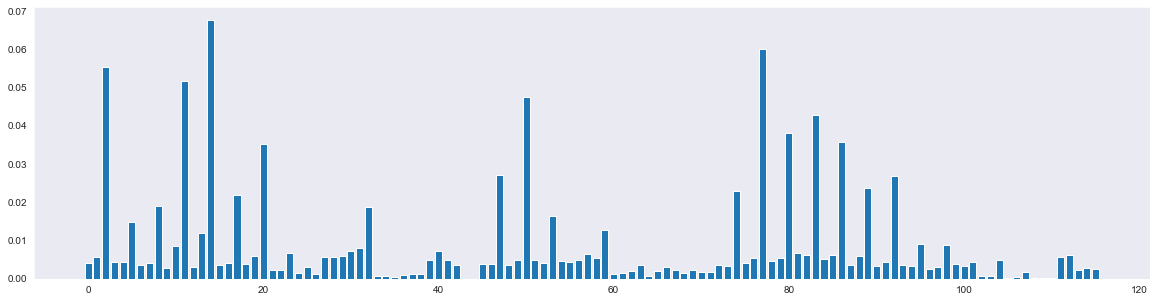

In [104]:
# plot
plt.figure(figsize=(20,5))
plt.bar(range(len(blackbox.feature_importances_)), blackbox.feature_importances_)
plt.show()

In [105]:
# feature_importance
importance = blackbox.feature_importances_

# create dataframe
Features = pd.DataFrame({'feature': features, 
                         'importance(%)': importance*100})

# sort features
Features.sort_values('importance(%)', ascending=False, inplace=True)
print("Sum of importance=", Features['importance(%)'].sum())
Features = Features.reset_index(drop=True)
Features[:40]

Sum of importance= 100.0


,feature,importance(%)
0,roam_og_mou_8,6.766219
1,total_rech_amt_8,5.996963
2,arpu_8,5.532624
3,roam_ic_mou_8,5.171576
4,loc_ic_t2m_mou_8,4.765001
5,last_day_rch_amt_8,4.278036
6,max_rech_amt_8,3.807869
7,total_rech_data_8,3.575347
8,loc_og_t2m_mou_8,3.527094
9,loc_ic_t2t_mou_8,2.704542


In [106]:
# extract top 'n' features
top_n = 30
top_features = Features['feature'][:30]

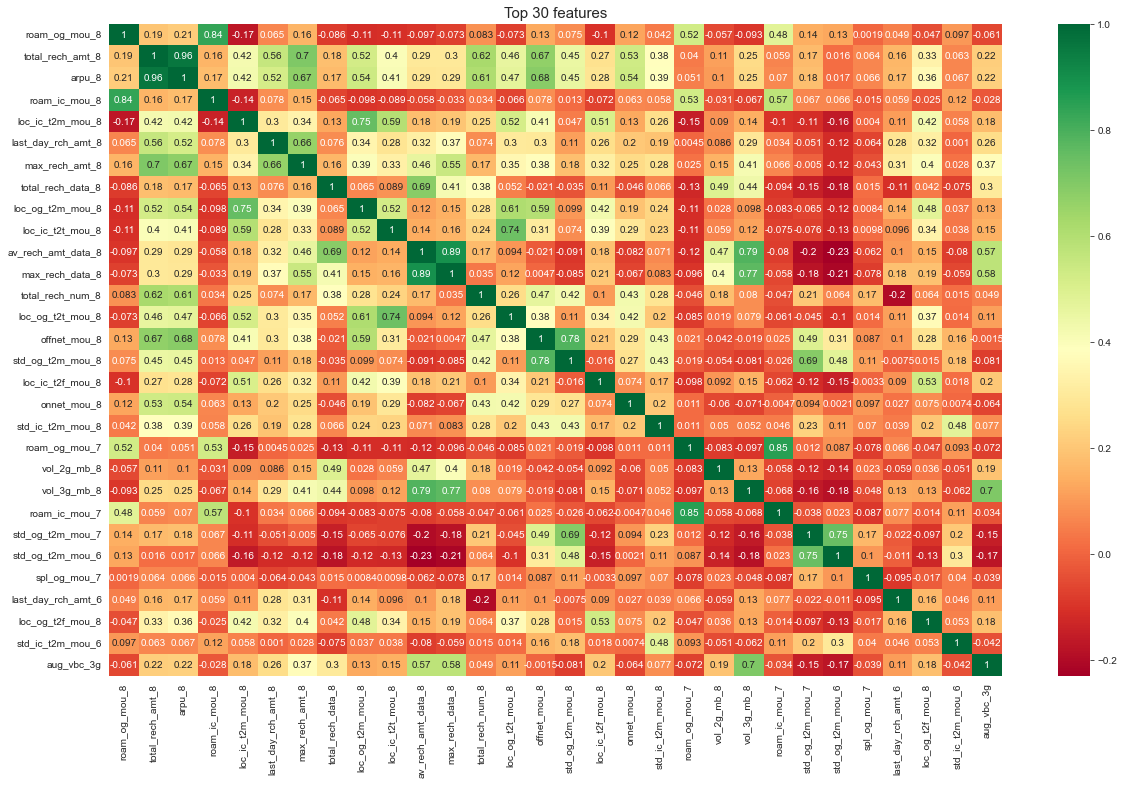

In [107]:
# plot feature correlation for top30 features
plt.rcParams["figure.figsize"] =(20,12)
sns.heatmap(dataset[top_features].corr(), annot=True, cmap='RdYlGn')
plt.title('Top 30 features', fontsize=15)
plt.show()

In [108]:
Best_feature = ['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
                'total_rech_data_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_ic_t2m_mou_8', 'std_og_t2m_mou_8',
                'onnet_mou_8', 'offnet_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2t_mou_8', 'spl_og_mou_7']

In [109]:
'''Blackbox model using top features'''

print('Top features: ', len(Best_feature))
# Tuned parameter
model = RandomForestClassifier(max_depth=20,
                               bootstrap = True,
                               n_estimators = 200,
                               criterion = 'entropy',
                               min_samples_leaf = 10,
                               min_samples_split = 10,
                               oob_score = True, 
                               n_jobs = -1)
model.fit(X_train[Best_feature], y_train)

Top features:  15


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200, n_jobs=-1,
                       oob_score=True)

In [110]:
# check score on train, test data
print(model.score(X_train[Best_feature], y_train))
print(model.score(X_test[Best_feature], y_test))

# evaluate predictions
y_pred = model.predict(X_test[Best_feature])
print(confusion_matrix(y_test, y_pred))

'''Summary '''
model_stats = stats(model, X_test[Best_feature], y_test)
model_stats

0.9459814949201741
0.9254354136429608
[[5106  406]
 [ 416 5096]]


,Accuracy(Prediction),Sensitivity,Specificity,AUC,F1 Score
0,0.93,0.92,0.93,0.93,0.93


<b>Important Features :</b>


                    * total_rech_amt_8
                    * roam_og_mou_8
                    * roam_ic_mou_8
                    * loc_ic_t2m_mou_8                    
                    * last_day_rch_amt_8
                    * total_rech_data_8
                    * std_og_t2m_mou_8
                    * av_rech_amt_data_8
                    * loc_og_t2m_mou_8
                    * std_ic_t2m_mou_8
                    * onnet_mou_8
                	* loc_ic_t2t_mou_8	
                    * loc_og_t2t_mou_8
                    * offnet_mou_8
                    * spl_og_mou_7

## Business Insights

        1. Incoming and Outgoing Calls on roaming for August month are strong indicators of churn behaviour.
        2. Average revenue per user seems to be most important feature in determining churn prediction.
        3. Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn                  
           behaviour.
        4. Average revenue per user seems to be most important feature in determining churn prediction.